
# Project: Investigate Medical Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset shows the attendance of patients to their scheduled appointment in a sample of 100k medical appointments in Brazil. The tables collect 7 columns of reservation attributes and 7 Characteristics for the patients.

#### Reservation attributes are:

**1. PatientId:** 
    Identification of patient.<br>
**2. AppointmentID:**
    Identification of each appointment.<br>
**3. ScheduledDay:**
    The day patient call for reserving an appointment.<br>
**4. AppointmentDay:**
    The reserved medical appointment day.<br>
**5. Neighbourhood:**
    The location of the medical appointment.<br>
**6. SMS_received:**
    Indicates the number of messages sent to the patient.<br>
**7. No-show:**
   Whether or not patients show up for their appointment where 'No' indicates show-up and 'Yes' indicates no-show.<br>

#### Patient Characteristics are:

**1. Gender:** 
    Patient gender either male 'M' or female 'F'.<br>
**2. Age:**
    The age of the patient.<br>
**3. Scholarship:**
    Is the patient enrolled in Brasilian welfare program '1' or not '0'.<br>
**4. Hipertension:**
    Is the patient hypertensive '1' or not '0'.<br>
**5. Diabetes:**
   Is the patient diabetic '1' or not '0'.<br>
**6. Alcoholism:**
   Is the patient alcoholic '1' or not '0'.<br>
**7. Handcap:**
   Is the patient handicaped '1' or not '0'.<br>



### Question(s) for Analysis

We will wrangle and explore the provided data to get insights about different factors that influence patients decision for missing the appointed medical visit.<br>
**We will try to answer those questions:**

##### Question 1: What is the percentage of patients who miss their medical appointment?
##### Question 2: Is the appointment day of the week has effect on missing the medical appointment?
##### Question 3: Which Gender is associated with higher chance of missing the medical appointment?
##### Question 4:  Does the waiting time (No. of days) correlates with missing the medical appointment?

#### First:
We will start our report by preparing our tools as importing all the required modules and defining function that facilitate our work and avoid repetition of code.

In [1]:
# Import all the required packages for analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

In [2]:
# Define a function to plot different graph types. 
def graph_plotter(kind, x, y, title, xlab=None, ylab=None):
    if kind.lower() == "bar":
        plt.figure(figsize=(8, 6))
        plt.subplot().yaxis.set_major_formatter(mtick.PercentFormatter())
        plt.bar(x, y, color ="maroon", width = 0.4)
        plt.title(f"{title}\n", fontweight="bold", fontsize=12)
        plt.xlabel(xlab, fontsize=12)
        plt.ylabel(ylab, fontsize=12)
        plt.show();
    elif kind.lower() == "pie":
        plt.figure(figsize=(8, 6))
        plt.pie(x, labels=y, autopct="%1.0f%%")
        plt.title(f"{title}\n", fontweight="bold", fontsize=12)
        plt.axis("equal")
        plt.show();

<a id='wrangling'></a>
## Data Wrangling

The purpose of this section is to inspect the general properties of the data to identify the required cleaning steps as deleting duplicates, searching for Null and wrong values, unifying columns name for easier data access, creating new columns, ...etc

In [3]:
# Load our data and print out a few lines.
med_app_data = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
med_app_data.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


>The initial look at the data preveal several problems as the names of the columns are not lowered, wrong spelling of "Hipertension" and "Handcap", the ambigousness of scholarship and no-show.

In [4]:
# print the statistical properities of the data
med_app_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>Here the column Age min value appears to be -1  which is not realistic, the column Handcap max value is 4 which is inconsistent with the data description (1 and 0).

In [5]:
# show the count of each value in Handcap column
med_app_data["Handcap"].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

>Furthur investigation of the values in the Handcap column shows that few rows (total of 199) have wrong values of 2,3 and 4.

In [6]:
# checking for the presence of Null values
med_app_data.isnull().any().sum()

0

>There is no missing values in the data

In [7]:
# checking for the presence of duplicate rows
med_app_data.duplicated().sum()

0

In [8]:
# checking the number of unique values in each column
med_app_data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
# checking for the presence of duplicate rows by PatientId and AppointmentDay together
med_app_data.duplicated(["PatientId", "AppointmentDay"]).sum()

8719

>The initial inspection shows the absence of duplicated rows. However, the number of unique values shows that there is duplicates in the PatientId with no duplication in AppointmentID column which could be explained as a single patient makes several different appointments in different days. We check for duplication by PatientId and AppointmentDay together to check for same patient with same appointment day which indicates duplication.

In [10]:
# print data type of each column
med_app_data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

>Here the type of data in ScheduledDay and AppointmentDay is object (str) while the data is datetime.


### Data Cleaning
In this section we will clean the data from the problems appeared in the **Data Wrangling**. We will lowercase columns names, correct the spelling of hipertension and handcap columns, change the name of scholarship and no-show columns to be more describing, remove the row with wrong age entry, remove rows with wrong entry in the handicap column, remove duplicate rows, change datatype of the appointmentday and Scheduledday to datetime type, change the data in the no-show column to be easily used, add two columns for day of the appointment date and the number of day between schedule day and appointment day, and lastly, remove the unwanted columns.

In [11]:
# show few lines of data to chane columns names
med_app_data.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [12]:
# change all columns names letters to the lowercase
med_app_data.rename(columns= lambda x: x.strip().lower(), inplace=True)

# correct hipertension column name to be hypertension
med_app_data.rename(columns= {"hipertension": "hypertension"}, inplace=True)

# correct handcap column name to be handicap
med_app_data.rename(columns= {"handcap": "handicap"}, inplace=True)

# change no-show column name to attend for more clarification
med_app_data.rename(columns= {"no-show": "attend"}, inplace=True)

# change scholarship column name to med_insured for more clarification
med_app_data.rename(columns= {"scholarship": "med_insured"}, inplace=True)

In [13]:
# assure that the column names has changed
med_app_data.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,med_insured,hypertension,diabetes,alcoholism,handicap,sms_received,attend
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


>**First:** We lowercased columns names, corrected the spelling of hipertension to hypertension and handcap to handicap, and changed the name of scholarship to med_insured and no-show to attend to be more describing.

In [14]:
# ceate a dateframe with negative value of age
wrong_age = med_app_data.query("age < 0")

# assure the presence of negative age values
wrong_age

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,med_insured,hypertension,diabetes,alcoholism,handicap,sms_received,attend
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [15]:
# drop the single row with dataframe indexing
med_app_data.drop(wrong_age.index, axis=0, inplace=True)

In [16]:
# check for the deletion of the row
med_app_data.query("age < 0")

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,med_insured,hypertension,diabetes,alcoholism,handicap,sms_received,attend


>**Second:** We removed the single row with the wrong age value through creating a dataframe that contains all the rows with the values of age column less than 0, then deleting those rows by their index number from the original data.

In [17]:
# ceate a dateframe with wrong values (2, 3, 4) of handicap
hand_234 = med_app_data.query(f"handicap in {[2, 3, 4]}")

# assure the creation of the dataframe
hand_234.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,med_insured,hypertension,diabetes,alcoholism,handicap,sms_received,attend
946,7.282582e+13,5582483,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,No


In [18]:
# drop the rows with dataframe indexing
med_app_data.drop(hand_234.index, axis=0, inplace=True)

In [19]:
# check for the values present in handicap column
med_app_data["handicap"].value_counts()

0    108285
1      2042
Name: handicap, dtype: int64

>**Third:** We removed rows with the wrong handicap value through creating a dataframe that contains all the rows with the values of handicap column equals to 2 or 3 or 4, then deleting those rows by their index number from the original data.

In [20]:
# check for the number of duplicated rows when selecting by patientid and appointmentday
med_app_data[["patientid", "appointmentday"]].duplicated().sum()

8699

In [21]:
# remove the duplicated rows
med_app_data.drop_duplicates(["patientid", "appointmentday"], inplace=True)

In [22]:
# recheck for the number of duplicated rows when selecting by patientid and appointmentday
med_app_data[["patientid", "appointmentday"]].duplicated().sum()

0

>**Fourth:** We removed the duplicate rows after categorization by patientid and appointmentday.

In [23]:
# check for the datatype of the required columns before change
med_app_data[["scheduledday", "appointmentday"]].dtypes

scheduledday      object
appointmentday    object
dtype: object

In [24]:
# change the data to datetime datatype
med_app_data["scheduledday"] = pd.to_datetime(med_app_data["scheduledday"])
med_app_data["appointmentday"] = pd.to_datetime(med_app_data["appointmentday"])

In [25]:
# assure the change has occured correctly
med_app_data[["scheduledday", "appointmentday"]].dtypes

scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
dtype: object

>**Fifth:** We changed the type of data in the scheduledday and appointmentday from being string to be datetime so that it will be correct and we can calculate time intervals between schedulw day and appointment day and find the week day of the appointment day.

In [26]:
# show the values present in the attend column
med_app_data["attend"].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
# show the count of each value
med_app_data["attend"].value_counts()

No     81241
Yes    20387
Name: attend, dtype: int64

In [28]:
# replace the current values and datatypes to be easily managed in the report after
med_app_data.replace(to_replace=["No", "Yes"], value=[1, 0], inplace=True)

In [29]:
# assure the change of values
med_app_data["attend"].unique()

array([1, 0])

In [30]:
# assure the correct change of values so that "No" corresponds to 1 and "Yes" corresponds to 0
med_app_data["attend"].value_counts()

1    81241
0    20387
Name: attend, dtype: int64

In [31]:
# assure the change of datatype to int
med_app_data["attend"].dtypes

dtype('int64')

>**Sixth:** We changed the values in the attend column to be 1 instead of "No" and 0 instead of "Yes" and their datatypes from being string to be integer. this will enable us to easily manipulate and process data in the **Exploratory Step**.

In [32]:
# create appointment_day column
med_app_data["appointment_day"] = med_app_data["appointmentday"].dt.day_name()

# check for the created column
med_app_data.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,med_insured,hypertension,diabetes,alcoholism,handicap,sms_received,attend,appointment_day
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Friday


In [33]:
# create booking_days column
med_app_data["booking_days"] = (med_app_data["appointmentday"].dt.date - med_app_data["scheduledday"].dt.date).dt.days

# check for the created column
med_app_data.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,med_insured,hypertension,diabetes,alcoholism,handicap,sms_received,attend,appointment_day,booking_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Friday,0


In [34]:
# show the values of the booking_days column
med_app_data["booking_days"].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  58,  51,  41,  49,  73,
        59,  64,  20,  57,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 102, 122, 101,
       105,  97,  93, 107,  95,  92, 139, 110, 132, 179, 117, 146, 123])

In [35]:
# ceate a dateframe with values of booking_days column less than 0
booking_df = med_app_data.query("booking_days < 0")

# drop the rows with dataframe indexing
med_app_data.drop(booking_df.index, axis=0, inplace=True)

# check for the deletion of the rows
med_app_data.query("booking_days < 0")

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,med_insured,hypertension,diabetes,alcoholism,handicap,sms_received,attend,appointment_day,booking_days


>**Seventh:** we added two columns one for the weekday of the appointment date which is called (appointment_day), and the second for the number of day(s) between schedule day and appointment day which is called (booking_days). we noticed the presence of negative value (-1) in the newly created booking_days column which is unrealistic to book after going to the appointment. As a result, we removed the rows with negative values as we did with the wrong age row.

In [36]:
# remove unwanted columns
med_app_data.drop(["patientid", "appointmentid", "scheduledday", "appointmentday"], axis=1, inplace=True)

# check for the cleaned dataframe
med_app_data.head()

,gender,age,neighbourhood,med_insured,hypertension,diabetes,alcoholism,handicap,sms_received,attend,appointment_day,booking_days
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Friday,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1,Friday,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Friday,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Friday,0


>**Eightieth:** We removed patientid, appointmentid, scheduledday, and appointmentday columns which will not be required for our analysis in this report.

In [37]:
# save the data after cleaning process
med_app_data.to_csv("Clean_MedApp_Data.csv", index=False)

>**lastly:** We saved the data after the cleaning process for future invistigation reports

<a id='eda'></a>
## Exploratory Data Analysis

In this section we will try to explore the data to get insights for answering our questions

In [38]:
# load the clean data after saving in the last step
medapp_df = pd.read_csv("Clean_MedApp_Data.csv")

# check for the load data
medapp_df.head(3)

,gender,age,neighbourhood,med_insured,hypertension,diabetes,alcoholism,handicap,sms_received,attend,appointment_day,booking_days
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Friday,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1,Friday,0


### Question 1: What is the percentage of patients who miss their medical appointment?

>we separated count of patients according to the attend column and pass the data to graph_plotter function to plot a pie chart by calculating the percentage of show and miss appointments

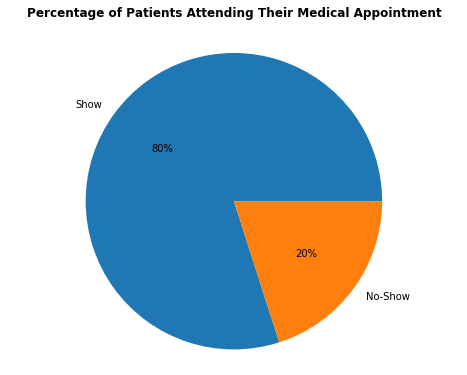

In [39]:
# specify the data and the labels for chart plotting
my_data = medapp_df["attend"].value_counts()
my_labels = ["Show", "No-Show"]

# use the previously defined function to plot a pie chart
graph_plotter("pie", my_data, my_labels, "Percentage of Patients Attending Their Medical Appointment")

> The Pie chart shows the percentage of patients who show in their appointment (80%) and miss their appointment (20%) based on 100K patient appointment from Brazil.

### Question 2: Is the appointment day of the week has effect on missing the medical appointment?

In [40]:
# count values of attend and miss for each weekday
medapp_df.groupby("appointment_day")["attend"].value_counts()

appointment_day  attend
Friday           1         13641
                 0          3660
Monday           1         16542
                 0          4323
Saturday         1            29
                 0             9
Thursday         1         12910
                 0          3078
Tuesday          1         18999
                 0          4683
Wednesday        1         19120
                 0          4630
Name: attend, dtype: int64

In [41]:
# creating a list of patient miss percentage for each working day of the week 
working_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
absence_per = []
for day in working_days:
    pt_total = medapp_df.query(f"appointment_day == '{day}'").shape[0]
    pt_atnd = medapp_df.query(f"appointment_day == '{day}'")["attend"].sum()
    pt_no = (((pt_total - pt_atnd) / pt_total) * 100)
    absence_per.append(pt_no)

> we separated the appointment_day column values (which appear to be six working days in the working_days list) and count the number of patients who show and miss for each day. Then, we create a list (absence_per) with number of miss appointments in each day divided by the total appointments made for that day and calculated percentage of miss appointments. We will pass absence_per and working_days list to plt a bar chart.

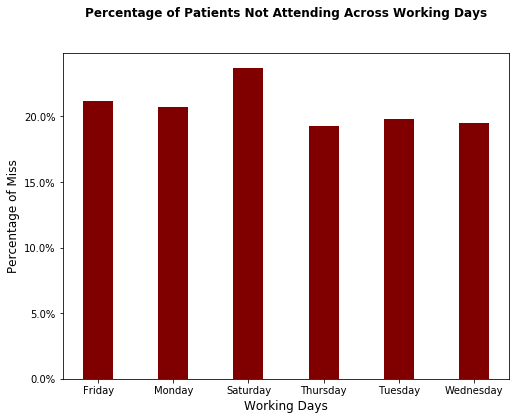

In [42]:
# plot a bar chart
x_axis = working_days
y_axis = absence_per
graph_plotter("bar", x_axis, y_axis, "Percentage of Patients Not Attending Across Working Days\n",
             "Working Days", "Percentage of Miss")

> The Bar chart shows the percentage of patients miss their medical appointment over each day of the working week-days. The chart shows that all days have close miss percentage with little increase in Friday, Monday, and Saturday which are a weekend day (Saturday) and border days around the weekend (Friday and Monday). However, assured correlation can not be specified. Further invistigation with extensive focus may be required.

### Question 3: Which Gender is associated with higher chance of missing the medical appointment?

In [43]:
# extract the count of males and females who miss their appointments
maleNoShow = medapp_df.groupby("attend")["gender"].value_counts()[0][1]
femaleNoShow = medapp_df.groupby("attend")["gender"].value_counts()[0][0]

# calculate the sum of miss appointments
totalNoShow = medapp_df.groupby("attend")["gender"].value_counts()[0].sum()

# calculate the percentage of males and females who miss in correspondance to total miss appointments
malePerTotalNoShow = ((maleNoShow / totalNoShow)*100)
femalePerTotalNoShow = ((femaleNoShow / totalNoShow)*100)

> we extracted the count of males and females who miss the appointment, then calculated the total number of missed appointments, followed by, calculating the percentage of each gender in the missed appointment group. 

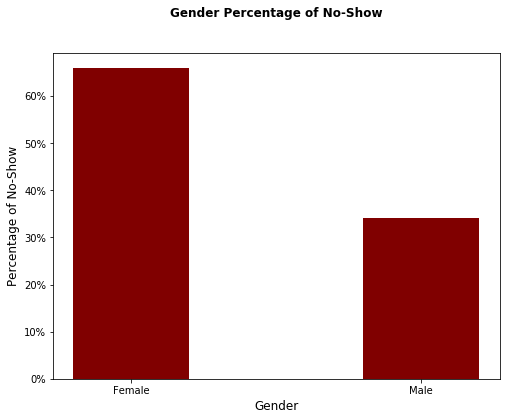

In [44]:
# plot a bar chart
x_axis_2 = ["Female", "Male"]
y_axis_2 = [femalePerTotalNoShow, malePerTotalNoShow]
graph_plotter("bar", x_axis_2, y_axis_2, "Gender Percentage of No-Show\n",
             "Gender", "Percentage of No-Show")

> The Bar chart shows the percentage of male and female miss their medical appointment. The chart shows that the percentage of females who miss their medical appointment nearly twice the percentage of males. This suggests that gender may act as a factor in missing the medical appointment. However, we have to check the total number of females and males in the data sample as may be this increase in percentage due to significantly higher number of females over males.

In [45]:
# extract the count of males and females who show in their appointments
maleShow = medapp_df.groupby("attend")["gender"].value_counts()[1][1]
femaleShow = medapp_df.groupby("attend")["gender"].value_counts()[1][0]

# calculate the percentage of males and females who miss in correspondance to total miss appointments
malePerTotalM = ((maleNoShow / (maleNoShow + maleShow))*100)
femalePerTotalF = ((femaleNoShow / (femaleNoShow + femaleShow))*100)

> we extracted the count of males and females who show in the appointment, then calculating the percentage of each gender in accordance to their total number in the data sample. 

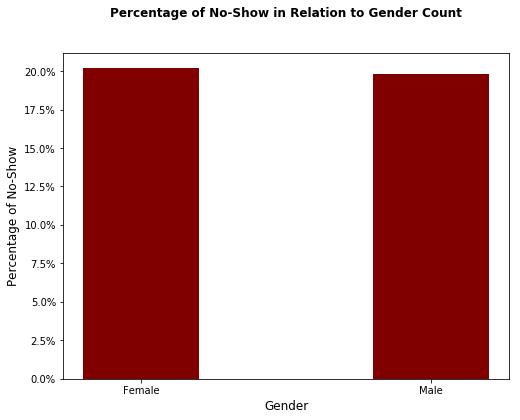

In [46]:
# plot a bar chart
y_axis_3 = [femalePerTotalF, malePerTotalM]
graph_plotter("bar", x_axis_2, y_axis_3, "Percentage of No-Show in Relation to Gender Count\n",
             "Gender", "Percentage of No-Show")

> The Bar chart shows the percentage of male and female miss their medical appointment in correlation to their total number in the data sample. The results show that approximately 20% of males or females miss their medical appointment. This results reveal that the previous increase in the percentage of females miss appointment is due to increase in the number of females over males in the data sample. As a result, the gender does not represent a factor that affect missing the medical appointments. 

### Question 4:  Does the waiting time (No. of days) correlates with missing the medical appointment?

In [47]:
# extract the count of miss appointments when the booking days are 0 
noShowSDB = medapp_df.query("booking_days == 0")["attend"].value_counts()[0]

# extract the count of miss appointments when the booking days are from 1 to 7
noShowWB = medapp_df.query("0 < booking_days <= 7")["attend"].value_counts()[0]

# extract the count of miss appointments when the booking days are more than 7
noShowMWB = medapp_df.query("booking_days > 7")["attend"].value_counts()[0]

In [48]:
# sum the count of appointments when the booking days are 0
bookZero = medapp_df.query("booking_days == 0")["attend"].value_counts().sum()

# sum the count of appointments when the booking days are 0
bookWeek = medapp_df.query("0 < booking_days <= 7")["attend"].value_counts().sum()

# sum the count of appointments when the booking days are 0
bookMoreWeek = medapp_df.query("booking_days > 7")["attend"].value_counts().sum()

#show a list of booking_days count
[bookZero, bookWeek, bookMoreWeek]

[34207, 30552, 36865]

> we extracted the count of missed appointments when the patients book the appointment in the same day (emergency), within a week, and more than a week. Then we summed the total count of appointments in the three booking days intervals. Afterwards, we will plot a pie chart of the percentage of missed appointments in accordance to the three booking days intervals.

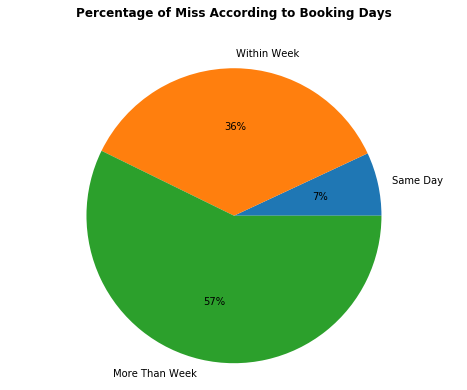

In [49]:
# plot pie chart
data = [noShowSDB, noShowWB, noShowMWB]
labels = ["Same Day", "Within Week", "More Than Week"]
graph_plotter("pie", data, labels, "Percentage of Miss According to Booking Days\n")

> The Pie chart shows that the percentage of patients who miss their medical appointment positively correlates with increasing booking days, in order to assure the validity of the findings we explore the total number of appointments in each interval which appears to be close in approximation to 33k. This findings suggest that as the days between scheduling the appointment and the appointment day increase, the probability of missing the appointment increase.

<a id='conclusions'></a>
## Conclusions


In this report, we invistigate a dataset of 100K medical appointments information in Brazil. The main purpose was to evaluate the factors affecting patients decision to miss the medical appointment. After wrangling and cleaning the data.

### Our data suggests that:<br>
    
**First:** People who book a medical appointment in Brazil have 20% chance of missing their medical appointment<br>

**Second:** The weekday of the appointment seems to have a little effect on missing the appointment. However, the assurement of that effect needs extensively-detailed information and further investigation.<br>

**Third:** The gender have no effect on missing the appointment as 20% of both males and females miss their medical appointment.<br>

**Fourth:** The duration between the scheduled day and the appointment day is positively correlated with missing the appointment.<br>

### Limitations of the dataset:<br>
    
**First:** All columns of the dataset are categorial which limit our analysis to descriptive so, we cannot correlate factors together and use inferential statistics to build predictive models.<br>

**Second:** The neighbourhood column is totaly useless as their is no information mentioning the distance to the medical between each neighbourhood and the clinic.<br>

**Third:** The sms_received column needs more clarification of when these messages were sent when scheduling the appointment, or one day before the appointment to remind patients of their appointment, or, after missing the appointment to notify patients of the missing.<br>

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0